In [1]:
import pyreadr
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import os

In [2]:
folder = './Netfabb/'
file_label = 'netfabb'
d = 3
min_step = 5*d -1
max_step = 149
steps = 150

alg_labels = ['GP EI','WGP EI','DGP VI EI','DGP MCMC EI','DGP SI EI']
regret_labels = ['GPEI','wgp','DGPBO_EI','MCMC_EI','DGPSIEI']
plt_labels = ['GP-BO','WGP-BO','DGP-DSVI-BO','DGP-MCMC-BO','DGP-SI-BO (Proposed)']
time_labels = ['GPEI','WGP','EI','MCMC_EI','DGPSIEI']

In [3]:
regret = np.zeros((7,steps))
i = 0
for label in alg_labels:
    file = folder+file_label+' ' + label+'.mat'
    data = sio.loadmat(file)
    regret_data = np.array(data['regret_' + regret_labels[i]])[:5,:steps]
    print(178.948476 - regret_data[:,-1])
    regret[i,:] = np.mean(regret_data[:],axis = 0)
    i = i + 1
    print(i)

[162.28895934 162.28895934 162.28895934 162.28895934 162.28895934]
1
[109.67579825 109.67579825 109.67579825 109.67579825 109.67579825]
2
[139.00652929 178.94847601 115.30357466 162.28895934 178.94847601]
3
[178.94847601 178.94847601 177.09862489 177.09862489 177.09862489]
4
[178.94847601 178.94847601 178.94847601 178.94847601 178.94847601]
5


/home/smartlab/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


In [4]:
label = alg_labels[1]
file = folder+file_label+' ' + label+'.mat'
data = sio.loadmat(file)

In [5]:
regret_data = np.array(data['regret_' + regret_labels[1]])[:,:steps]

(15.0, 150.0)

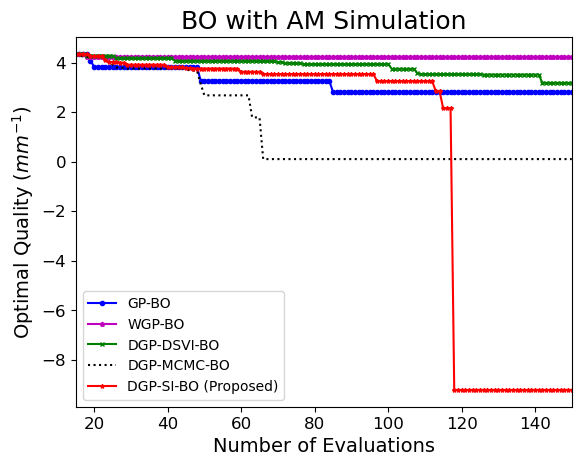

In [19]:
symbols = ['-o','-p','-x',':','-*']
colors = ['b','m','g','k','r']

a = 20
b = 10
#--------------------------
idx = 0
fig,ax = plt.subplots()
# ax.figure.set_size_inches(a,b)

plt_labels = ['GP-BO','WGP-BO','DGP-DSVI-BO','DGP-MCMC-BO','DGP-SI-BO (Proposed)']


for i in range(5):
    plt_x = 15 + np.arange(136)
    plt_y = 178.9485 -regret[i,14:]
    # plt_y = regret[i,14:] + 1e-4
    # plt_e_l =  regrets_mean_full[idx][i,:] - regrets_se_full[idx][i,:]
    # plt_e_u =  regrets_mean_full[idx][i,:] + regrets_se_full[idx][i,:]
    ax.plot(plt_x,plt_y,symbols[i],color = colors[i],label = plt_labels[i],markersize = 3)
    # ax.fill_between(plt_x,plt_e_l,plt_e_u,color = colors[i],alpha=0.3)

ax.legend(loc=0)

# ax.set_yscale('log')
ax.set_ylabel('Optimal Quality ($mm^{-1}$)',fontsize = 14)
ax.set_xlabel('Number of Evaluations',fontsize=14)
ax.set_title('BO with AM Simulation',fontsize = 18)
ax.tick_params(axis = 'x',labelsize = 12)
ax.tick_params(axis = 'y',labelsize = 12)

ax.set_xlim([15,150])

ax.set_yscale('log')
# plt.savefig('AM_Regrets.pdf', format='pdf',pad_inches=0)

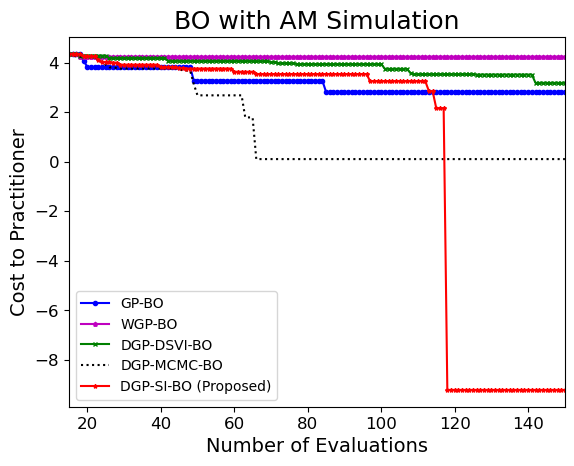

In [39]:
symbols = ['-o','-p','-x',':','-*']
colors = ['b','m','g','k','r']

a = 20
b = 10
#--------------------------
idx = 0
fig,ax = plt.subplots()
# ax.figure.set_size_inches(a,b)

plt_labels = ['GP-BO','WGP-BO','DGP-DSVI-BO','DGP-MCMC-BO','DGP-SI-BO (Proposed)']


for i in range(5):
    plt_x = 15 + np.arange(136)
    # plt_y = 178.9485 -regret[i,14:]
    plt_y = regret[i,14:] + 1e-4
    # plt_e_l =  regrets_mean_full[idx][i,:] - regrets_se_full[idx][i,:]
    # plt_e_u =  regrets_mean_full[idx][i,:] + regrets_se_full[idx][i,:]
    ax.plot(plt_x,np.log(plt_y),symbols[i],color = colors[i],label = plt_labels[i],markersize = 3)
    # ax.fill_between(plt_x,plt_e_l,plt_e_u,color = colors[i],alpha=0.3)

ax.legend(loc=0)

# ax.set_yscale('log')
ax.set_ylabel('Cost to Practitioner',fontsize = 14)
ax.set_xlabel('Number of Evaluations',fontsize=14)
ax.set_title('BO with AM Simulation',fontsize = 18)
ax.tick_params(axis = 'x',labelsize = 12)
ax.tick_params(axis = 'y',labelsize = 12)

ax.set_xlim([15,150])

# ax.set_yscale('log')
plt.savefig('AM_Regrets_review.pdf', format='pdf',pad_inches=0)

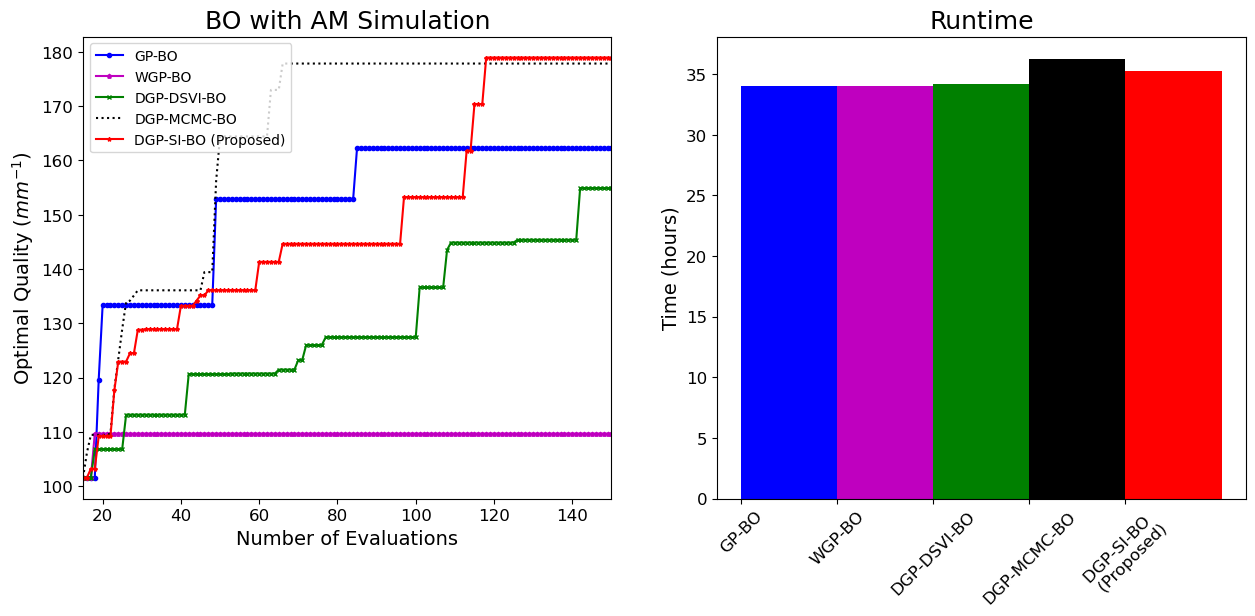

In [20]:
fig,axs = plt.subplots(1,2)
# ax.figure.set_size_inches(a,b)
plt_labels = ['GP-BO','WGP-BO','DGP-DSVI-BO','DGP-MCMC-BO','DGP-SI-BO (Proposed)']
ax = axs[0]

a = 15
b = 6
ax.figure.set_size_inches(a,b)


for i in range(5):
    plt_x = 15 + np.arange(136)
    plt_y = 178.9485 -regret[i,14:]
    # plt_e_l =  regrets_mean_full[idx][i,:] - regrets_se_full[idx][i,:]
    # plt_e_u =  regrets_mean_full[idx][i,:] + regrets_se_full[idx][i,:]
    ax.plot(plt_x,plt_y,symbols[i],color = colors[i],label = plt_labels[i],markersize = 3)
    # ax.fill_between(plt_x,plt_e_l,plt_e_u,color = colors[i],alpha=0.3)

ax.legend(loc=0)

# ax.set_yscale('log')
ax.set_ylabel('Optimal Quality ($mm^{-1}$)',fontsize = 14)
ax.set_xlabel('Number of Evaluations',fontsize=14)
ax.set_title('BO with AM Simulation',fontsize = 18)
ax.tick_params(axis = 'x',labelsize = 12)
ax.tick_params(axis = 'y',labelsize = 12)

ax.set_xlim([15,150])
#--------------------------------------------------------------------------------------
bar_names= ['GP-BO','WGP-BO','DGP-DSVI-BO','DGP-MCMC-BO','DGP-SI-BO \n (Proposed)']
colors = ['b','m','g','k','r']

time_bar = np.zeros((5,))
ax = axs[1]
for i in range(5):
        time_bar[i] = np.sum(runtime[i,14:]) + 15*136*60

ax.figure.set_size_inches(a,b)
# ax.legend(loc=0)

# ax.set_yscale('log')
ax.bar(bar_names,time_bar/3600,color = colors, width = 1.0,align = 'edge')
ax.tick_params(axis = 'x',labelsize = 12,labelrotation=45)
   
ax.set_ylabel('Time (hours)',fontsize = 14)

ax.set_title('Runtime',fontsize = 18)
ax.tick_params(axis = 'x',labelsize = 12)
ax.tick_params(axis = 'y',labelsize = 12)

# ax.set_yscale('log')
# plt.savefig('AM_Regrets_TimeBar.pdf', format='pdf',bbox_inches = 'tight')
# plt.savefig('AM_Regrets_TimeBar.svg', format='svg',transparent = True,bbox_inches = 'tight')

In [ ]:
time_bar

In [5]:
for i in range(5):
    print(plt_labels[i]+' Regret Mean = ',178.948476 - regret[i,max_step])

GP-BO Regret Mean =  162.28895934035054
WGP-BO Regret Mean =  109.67579824944139
DGP-DSVI-BO Regret Mean =  154.89920306090772
DGP-MCMC-BO Regret Mean =  177.83856533550494
DGP-SI-BO (Proposed) Regret Mean =  178.94847600602935


In [8]:
runtime = np.zeros((6,136))
i = 0
for label in alg_labels:
    file = folder+file_label+' ' + label+'.mat'
    data = sio.loadmat(file)
    runtime_data = np.array(data['runtime_' + time_labels[i]])[:,14:]
    runtime_data = np.nan_to_num(runtime_data)
    runtime[i,:] = np.mean(runtime_data,axis=0)
    # print(plt_labels[i]+' Runtime (Averaged) = ',runtime[i])
    i = i + 1
    
for i in range(5):
    print(plt_labels[i]+' Runtime = ',np.mean(runtime[i,14:]))

GP-BO Runtime =  0.47114661482513925
WGP-BO Runtime =  1.1045868076261924
DGP-DSVI-BO Runtime =  6.129126236868687
DGP-MCMC-BO Runtime =  67.50052622950821
DGP-SI-BO (Proposed) Runtime =  36.3810540926261


In [ ]:
runtime_plt_data =np.zeros(runtime.shape)
runtime_plt_data[:,min_step] = 0 
for i in range(6):
    for j in range(min_step+1,max_step+1):
        runtime_plt_data[i,j] = runtime_plt_data[i,j-1] + runtime[i,j]

In [ ]:
runtime_plt_data[1,min_step+1]

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

regret_plt = regret
regret_plt[:,min_step-1]=regret_plt[:,min_step]

for i in range(4,6):
    # if(i==3):
    #     continue
    ax.plot(runtime_plt_data[i,min_step:],regret[i,min_step-1:max_step],label = plt_labels[i])

ax.legend()
ax.set_title(file_label)
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlim([120*60,30000])

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

regret_plt = regret
regret_plt[:,min_step-1]=regret_plt[:,min_step]

for i in range(4,6):
    # if(i==3):
    #     continue
    ax.plot(range(min_step+1,max_step+1),runtime[i,min_step+1:]/60,label = plt_labels[i])

ax.legend()
ax.set_title(file_label)
# ax.set_yscale('log')
# ax.set_xscale('log')

In [ ]:
runtime_plot = np.zeros((2,steps))
i = 0
for label in alg_labels[-2:]:
    file = folder+file_label+' ' + label+'.mat'
    data = sio.loadmat(file)
    runtime_data = np.array(data['runtime_' + time_labels[-2+i]])[:,:steps]
    runtime_plot[i,:] = np.mean(runtime_data,axis = 0)
    i = i + 1

In [ ]:
for i in range(min_step+2,200):
    runtime_plot[:,i] = runtime_plot[:,i] + runtime_plot[:,i-1]  

In [ ]:
runtime_plot[:,min_step+1]

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(runtime_plot[0,min_step+1:],regret[-3,min_step+1:],'b')
ax.plot(runtime_plot[1,min_step+1:],regret[-2,min_step+1:],'r')
# ax.set_xlim([0,1500])
# ax.set_yscale('log')
ax.set_xscale('log')

In [ ]:
plt.plot(runtime_data[0,:])

In [ ]:
i = 5
file = folder+file_label+' '+ alg_labels[i]+'.mat'
data = sio.loadmat(file)
np.array(data['runtime_' + time_labels[i]])[1,:steps]

In [ ]:
final_index = 149
n_reps = 10

print('MCMC EI Regret mean = ',np.mean(regret_EI_MCMC[:,final_index],axis=0))
se = np.std(regret_EI_MCMC[:,final_index],axis=0)/n_reps
print('MCMC EI Regret SE = ',se)

print('SI UCB Regret mean = ',np.mean(regret_SI_UCB[:,final_index],axis=0))
se = np.std(regret_SI_UCB[:,final_index],axis=0)/n_reps
print('SI UCB Regret SE = ',se)

print('SI EI Regret mean = ',np.mean(regret_SI_EI[:,final_index],axis=0))
se = np.std(regret_SI_EI[:,final_index],axis=0)/n_reps
print('SI EI Regret SE = ',se)

In [ ]:
result = pyreadr.read_r('./camel6h/camel6h DGP MCMC EI.rds') # also works for RData

# done! 
# result is a dictionary where keys are the name of objects and the values python
# objects. In the case of Rds there is only one object with None as key
df = result[None] # extract the pandas data frame 
MCMC_EI_regret = np.array(df)
# print("MCMC EI time: ",np.mean(MCMC_EI_time[:,21:149]))

# SI_UCB_time = data_SI_UCB["runtime_DGPUCB"]
# print("SI UCB time: ", np.mean(SI_UCB_time[:,21:149]))

# print("SI EI time: ", np.mean(SI_EI_time[:,21:149]))
mdic = {"current_opt_GPUCB": current_opt,"regret_GPUCB": regret, "runtime_GPUCB":time_elapsed}
sio.savemat(folder+label+"_GPUCB_"+ str(time.asctime(time.localtime(time.time())))+"_iter"+str(iters)+".mat", mdic)

In [ ]:
import keras
print(keras.__version__)

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
import numpy as np
np.arange(3)